# Math 76 HW3, Summer 2025

**Name:**

For all plots, make sure to include a title, x-axis label, and y-axis label.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma_func

from hw2_helper_funcs import *

# Problem 3.5

## Part A

Derive the formula 
\begin{align}
a_{ij} = \frac{d}{n} \left( d^2 + ((i-j)/n)^2 \right)^{-3/2}, \quad i,j = 1, \ldots, n
\end{align}
for the matrix elements.

**Response:** *(it may be easier to do this on paper and submit it alongside the notebook)*

## Answer for Part A

We start with the continuous kernel:

$$
K(s,t) \;=\; \frac{d}{\bigl(d^2 + (s - t)^2\bigr)^{3/2}}, 
\quad s,t \in [0,1]
$$

Divide the interval [0,1] into n equal subintervals of length
   $$
   h = \frac{1}{n},
   \quad 
   s_i = i\,h,\; t_j = j\,h,
   \quad i,j = 1,\dots,n
   $$

Midpoint Rule to approximate integral operator
   $$
   \int_0^1 K(s_i,t)\,f(t)\,\mathrm{d}t
   \;\approx\;
   \sum_{j=1}^n K(s_i,t_j)\,f(t_j)\,h
   $$
   
Thus the matrix A has entries
   $$
   a_{ij}
   = h\,K(s_i,t_j)
   = \frac{1}{n}\,\frac{d}{\bigl(d^2 + (s_i - t_j)^2\bigr)^{3/2}}
   $$

Noting that
   $$
   s_i - t_j = (i - j)\,h = \frac{i - j}{n}
   $$
   
We obtain
   $$
   a_{ij}
   = \frac{d}{n}\,
   \Bigl(d^2 + \bigl(\tfrac{i-j}{n}\bigr)^2\Bigr)^{-3/2},
   \quad i,j = 1,\dots,n
   $$

Hence, the discrete kernel matrix is

$$
\boxed{
  a_{ij}
  = \frac{d}{n}\,\bigl(d^2 + ((i-j)/n)^2\bigr)^{-3/2},
  \quad i,j = 1,\dots,n
}
$$


## Part B

Compute $ b = A x $ for two different exact solutions $x$: (1) a smooth solution (not a constant or linear vector) and (2) a vector with one or more jump discontinuities. Plot both vectors and label them.

In [7]:
# Parameters
n = 32
d = 0.3

# Build A matrix
A = build_gravity_matrix(n,d)

# Smooth x_true
t = np.linspace(1/n, 1, n)
x_smooth = np.sin(2 * np.pi * t) # your vector here

# Piecewise constant x_true
x_piecewise_constant = (np.arange(n) > n//2).astype(float) # your vector here

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


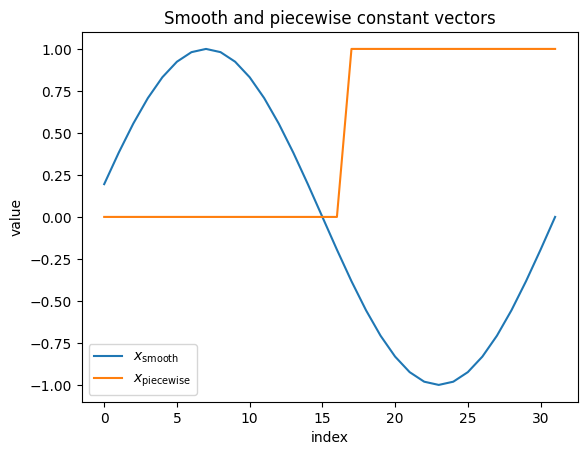

In [8]:
plt.plot(x_smooth, label="$x_{\\text{smooth}}$")
plt.plot(x_piecewise_constant, label="$x_{\\text{piecewise}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth and piecewise constant vectors")
plt.legend()
plt.show()

In [9]:
# Compute rhs vectors
b_smooth = A @ x_smooth
b_piecewise_constant = A @ x_piecewise_constant

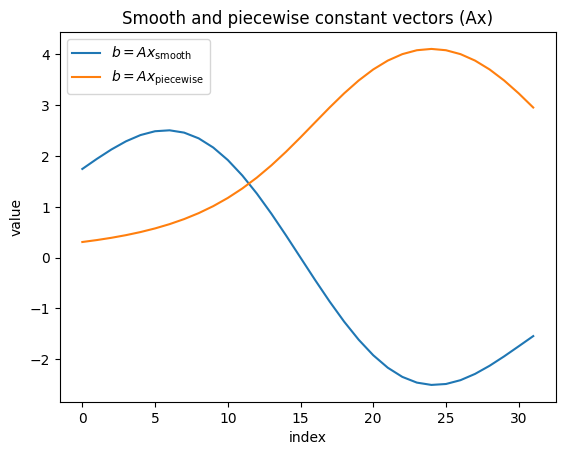

In [10]:
plt.plot(b_smooth, label="$b = A x_{\\text{smooth}}$")
plt.plot(b_piecewise_constant, label="$b = A x_{\\text{piecewise}}$")
plt.xlabel("index")
plt.ylabel("value")
plt.title("Smooth and piecewise constant vectors (Ax)")
plt.legend()
plt.show()

# Part C

Study how the RHS vectors change with the depth parameter $d$. *Suggestion: plot the rhs vectors $b$ for varying parameter $d$ on the same plot. Make sure to label each curve with the value of $d$ that was used.*

### For smooth $x_{\text{true}}$

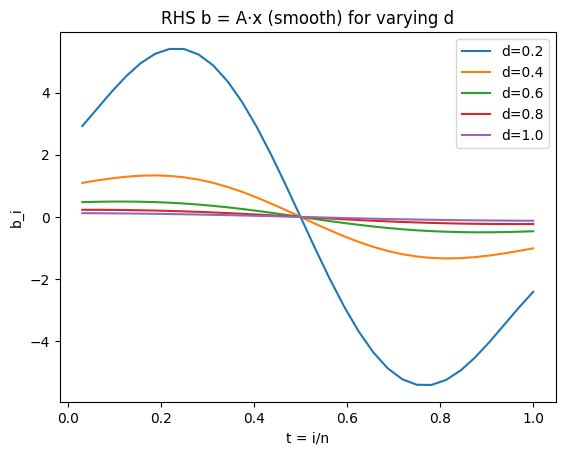

In [13]:
depths = [0.2, 0.4, 0.6, 0.8, 1.0]

for dep in depths:
    A = build_gravity_matrix(n, dep)
    plt.plot(t, A @ x_smooth, label=f"d={dep}")
plt.title("RHS b = A·x (smooth) for varying d")
plt.xlabel("t = i/n")
plt.ylabel("b_i")
plt.legend()


### For piecewise constant $x_{\text{true}}$

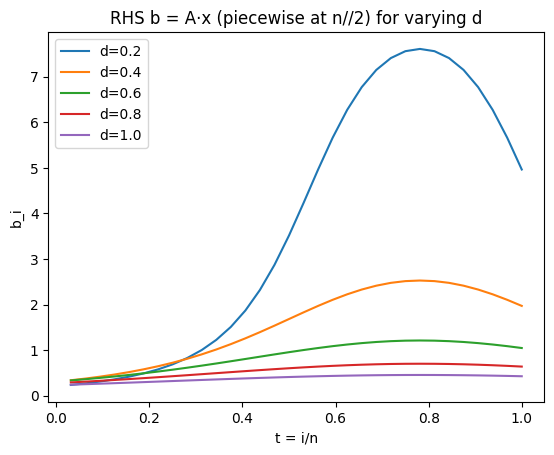

In [15]:
for dep in depths:
    A = build_gravity_matrix(n, dep)
    plt.plot(t, A @ x_piecewise_constant, label=f"d={dep}")
plt.title("RHS b = A·x (piecewise at n//2) for varying d")
plt.xlabel("t = i/n") 
plt.ylabel("b_i")
plt.legend()


## Part D

Study how the condition number of $A$ varies for varying $d$ and fixed $n$; then, study how the condition number of $A$ varies for varying $n$ but fixed $d$.

### Varying $d$, fixed $n$

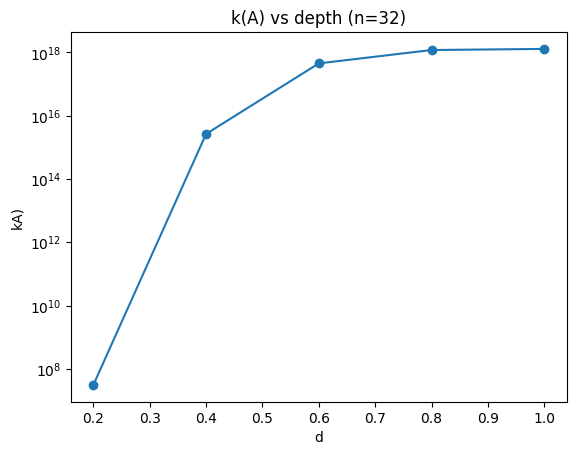

In [18]:
conds_vs_dep = []

for dep in depths:
    A = build_gravity_matrix(n, dep)
    conds_vs_dep.append(np.linalg.cond(A))

plt.semilogy(depths, conds_vs_dep, 'o-')
plt.title('k(A) vs depth (n=32)')
plt.xlabel('d')
plt.ylabel('kA)')
plt.show()

**Explanation of observed behavior:**
As the depth d increases, the gravity‐kernel entries become nearly constant across all sensor pairs, so A approaches a rank‑1 matrix and its smallest singular values collapse toward zero, driving the condition number from moderate values to the floating point limit.



### Varying $n$, fixed $d$

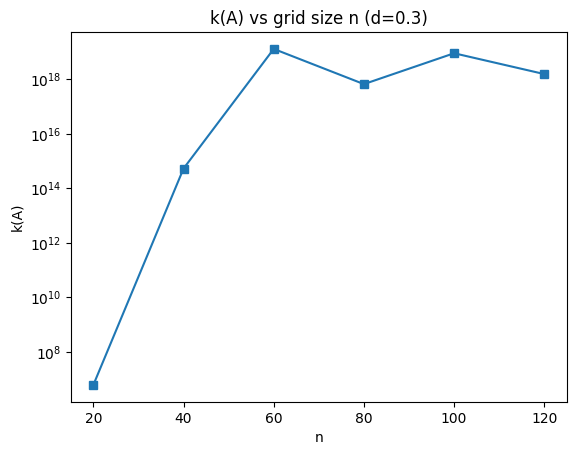

In [21]:
ns = [20, 40, 60, 80, 100, 120]

conds_vs_n = []
for n_val in ns:
    A_n = build_gravity_matrix(n_val, d)
    conds_vs_n.append(np.linalg.cond(A_n))

plt.semilogy(ns, conds_vs_n, 's-')
plt.title('k(A) vs grid size n (d=0.3)')
plt.xlabel('n')
plt.ylabel('k(A)')
plt.show()


**Explanation of observed behavior:**
As n increases, the later spacing becomes finer, so the gravity kernel rows look more and more alike where A moves towards rank 1. Hence the condition number shoots up from n=20 to n=60. Beyond that, the smallest singual alues has already fallen to ~$10^{-16}$, so the condition number cannot grow any further.

## Part E

Solve the problem $A x = b$ using a noise-free rhs $b$. Then, try again but instead solve $A x = b + \delta$ where $\delta$ is a white noise Gaussian vector $\delta \sim \mathcal{N}(\mathbf{0}, \sigma^2 \mathbf{I})$.

In [24]:
# Build matrix
A = build_gravity_matrix(n,d)

# Get exact b's
b_smooth = A @ x_smooth
b_piecewise_constant = A @ x_piecewise_constant


Solve $A x = b$ (for both smooth and piecewise constant vectors), and plot

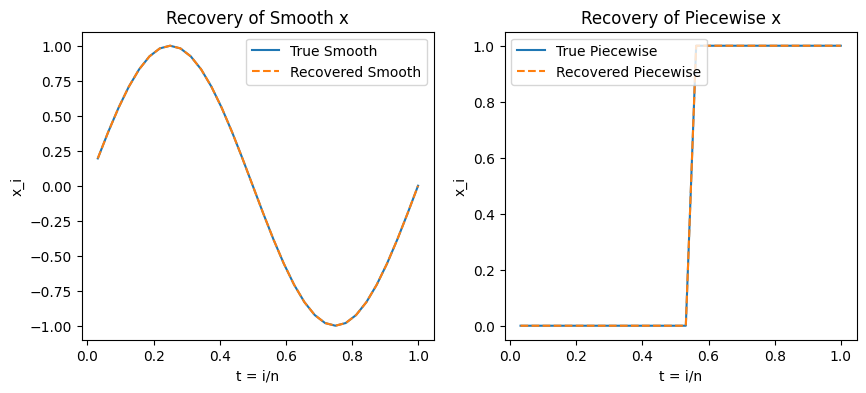

In [26]:

x_rec_smooth = np.linalg.solve(A, b_smooth)
x_rec_piecewise = np.linalg.solve(A, b_piecewise_constant)

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x_smooth, label='True Smooth')
plt.plot(t, x_rec_smooth, '--', label='Recovered Smooth')
plt.title('Recovery of Smooth x')
plt.xlabel('t = i/n')
plt.ylabel('x_i')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, x_piecewise_constant, label='True Piecewise')
plt.plot(t, x_rec_piecewise, '--', label='Recovered Piecewise')
plt.title('Recovery of Piecewise x')
plt.xlabel('t = i/n')
plt.ylabel('x_i')
plt.legend(loc='upper left')

Solve $A x = b + \delta$ (for both smooth and piecewise constant vectors), and plot

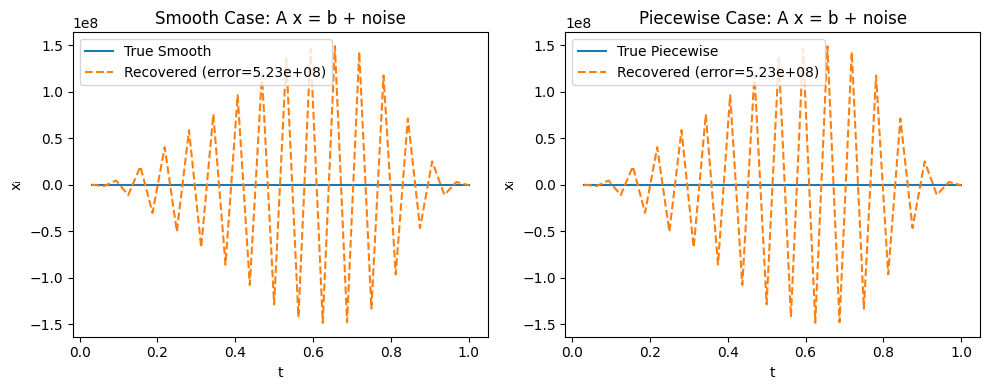

In [28]:
noise_lvl = 1e-2
np.random.seed(0)
noise = noise_lvl * np.random.randn(A.shape[0])

b_smooth_noisy = b_smooth + noise
b_piecewise_noisy = b_piecewise_constant + noise

x_est_smooth = np.linalg.solve(A, b_smooth_noisy)
x_est_piecewise = np.linalg.solve(A, b_piecewise_noisy)

error_smooth = np.linalg.norm(x_est_smooth - x_smooth,    2)
error_piecewise = np.linalg.norm(x_est_piecewise - x_piecewise_constant, 2)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, x_smooth, label='True Smooth')
plt.plot(t, x_est_smooth, '--', label=f'Recovered (error={error_smooth:.2e})')
plt.title('Smooth Case: A x = b + noise')
plt.xlabel('t')
plt.ylabel('xᵢ')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, x_piecewise_constant, label='True Piecewise')
plt.plot(t, x_est_piecewise, '--', label=f'Recovered (error={error_piecewise:.2e})')
plt.title('Piecewise Case: A x = b + noise')
plt.xlabel('t')
plt.ylabel('xᵢ')
plt.legend()

plt.tight_layout()
plt.show()

How large can $||\delta||_2$ get before the inverted noise starts to dominate? Design a computational study/visualization below to support your claim.

**Response:**
According to the graph, once the noise threshold norm passes around $10^{-11}$, the inverted noise starts to dominate the recovery and the recovered x is no longer meaningful.

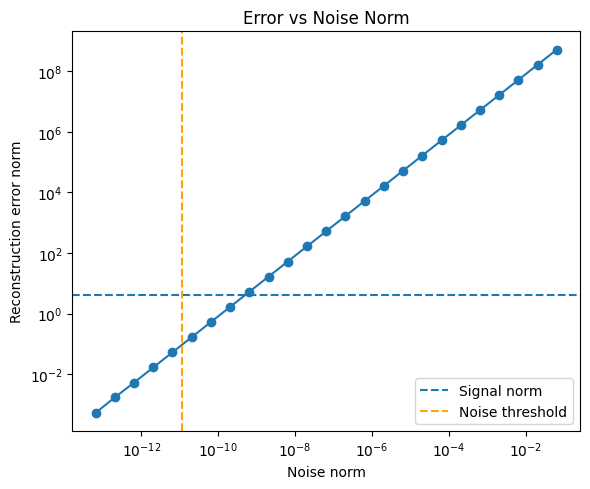

Condition number: 3.44e+11
Signal norm: 4.00e+00
Noise threshold: 1.16e-11


In [30]:
cond_num = np.linalg.cond(A)
signal_norm = np.linalg.norm(x_smooth, 2)
noise_lvls = np.logspace(-14, -2, 25)

noise_norms = []
err_norms = []

for lvl in noise_lvls:
    np.random.seed(0)
    noise_vector = lvl * np.random.randn(n)
    noise_norms.append(np.linalg.norm(noise_vector, 2))
    x_rec = np.linalg.solve(A, b_smooth + noise_vector)
    err_norms.append(np.linalg.norm(x_rec - x_smooth, 2))

noise_threshold = signal_norm / cond_num

plt.figure(figsize=(6, 5))
plt.loglog(noise_norms, err_norms, 'o-')
plt.axhline(signal_norm, linestyle='--', label='Signal norm')
plt.axvline(noise_threshold, linestyle='--', color='orange', label='Noise threshold')
plt.xlabel('Noise norm')
plt.ylabel('Reconstruction error norm')
plt.title('Error vs Noise Norm')
plt.legend()
plt.tight_layout()
plt.show()

print(f'Condition number: {cond_num:.2e}')
print(f'Signal norm: {signal_norm:.2e}')
print(f'Noise threshold: {noise_threshold:.2e}')


# Problem 3.6

## Part A

Generate the problem.

In [33]:
n = 24
A, b_exact, x_exact = shaw(n)

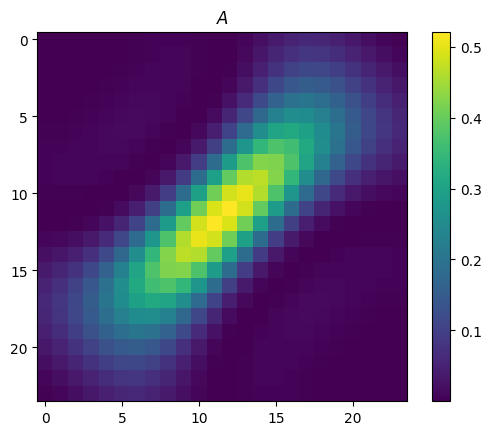

In [34]:
plt.imshow(A)
plt.title("$A$")
plt.colorbar()
plt.show()

Get the SVD (use `np.linalg.svd`).

In [36]:
U, s, Vt = np.linalg.svd(A)
V = Vt.T

print("Left singular vectors U shape:", U.shape)
print("Singular values:", s)
print("Right singular vectors Vt shape:", V.shape)

Left singular vectors U shape: (24, 24)
Singular values: [2.99334708e+00 1.85684877e+00 1.03421930e+00 3.93595717e-01
 5.89725967e-02 3.46098627e-02 2.45572635e-02 4.12202303e-03
 1.17628267e-03 6.27737906e-05 6.46850971e-06 1.77601138e-06
 3.30761221e-07 3.15369797e-08 2.03175206e-09 1.25551297e-10
 1.17923609e-11 3.61074560e-13 4.41928126e-14 4.09362226e-15
 1.79033286e-16 1.61809391e-16 1.30770605e-16 6.68043947e-18]
Right singular vectors Vt shape: (24, 24)


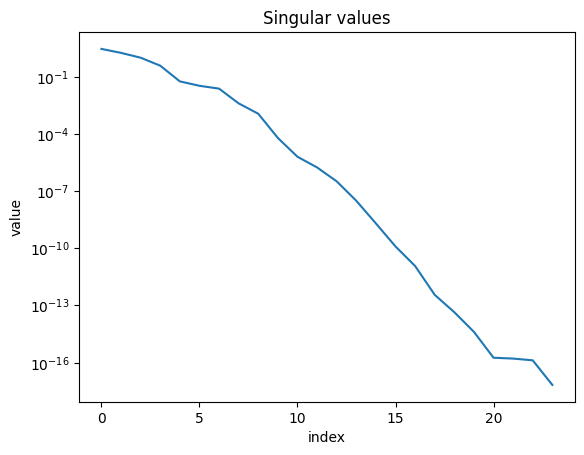

In [37]:
plt.semilogy(s)
plt.title("Singular values")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

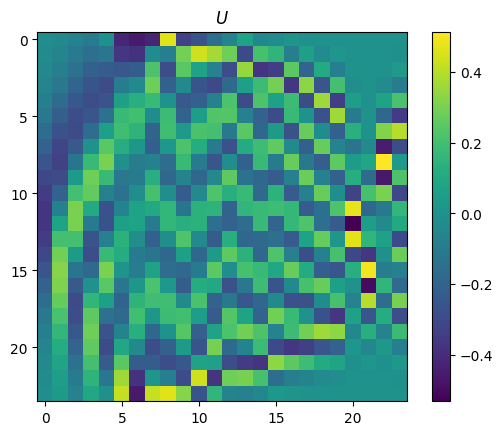

In [38]:
plt.imshow(U)
plt.title("$U$")
plt.colorbar()
plt.show()

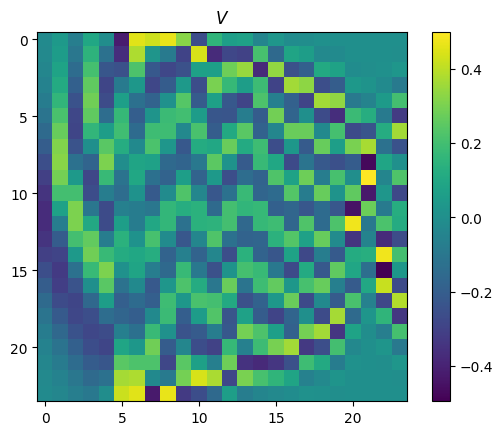

In [39]:
plt.imshow(V)
plt.title("$V$")
plt.colorbar()
plt.show()

What can be said about the number of sign changes in the left and right singular vectors? Try computing the number of sign changes in each vector and plotting them as a function of $i$. For convenience, you can use the function `count_sign_switches` in `hw2_helper_funcs.py`.

**Response:** Overall, the plot shows an almost perfectly straight‑line increase. Each mode i has about i-1 sign‑flips, reflecting that higher singular vectors oscillate more. The small mismatches you see for between i=21 to 24 are simply numerical artifacts (tiny entries changing sign and arbitrary global choices). In exact arithmetic each singular vector would have exactly \(i-1\) sign changes.

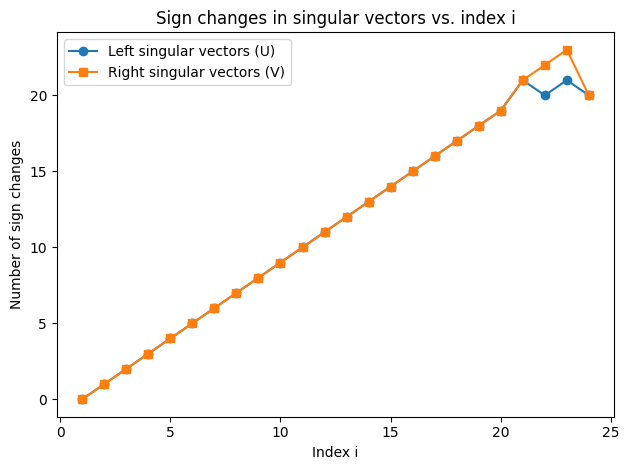

In [41]:
sign_changes_U = [count_sign_switches(U[:, i]) for i in range(n)]
sign_changes_V = [count_sign_switches(V[:, i]) for i in range(n)]

indices = np.arange(1, n+1)
plt.plot(indices, sign_changes_U, 'o-', label='Left singular vectors (U)')
plt.plot(indices, sign_changes_V, 's-', label='Right singular vectors (V)')
plt.xlabel('Index i')
plt.ylabel('Number of sign changes')
plt.title('Sign changes in singular vectors vs. index i')
plt.legend()
plt.tight_layout()
plt.show()


## Part B

Use the function `picard` from `hw2_helper_funcs.py` to inspect the singular values and SVD coefficients. Is the Picard condition satisfied? Why or why not?

**Response:**
No, the Picard condition is not satisfied because singular values are decaying steadily towards zero, but the coefficients level off at around 10^-16 which causes the ratios to increase for large i instead of remaining bounded.

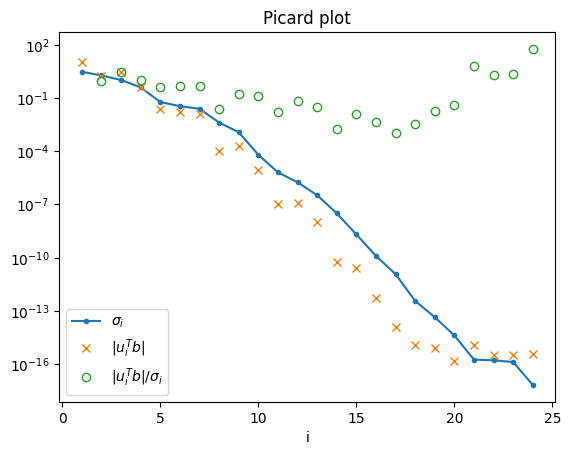

In [43]:
eta = picard(U, s, b_exact)


## Part C

Add a small amount of noise to $b_{\text{exact}}$, i.e., $b = b_{\text{exact}} + e$ with $\| e \|_2/\| b_{\text{exact}} \|_2 = 10^{-10}$. Inpsect the new Picard plot. What happens to the SVD coefficients $u_i^T b$ corresponding to small singular values?

**Response:**
Once the singular values become very small, the coeefficients stop following the decay of the singular values and plateau roughly at a constant. As a result, the ratios increase indicating that high index modes are dominated by noise rather than signal.

In [45]:
epsilon = 1e-10

e = np.random.randn(n)
e = e / np.linalg.norm(e)
e = e * (np.linalg.norm(b_exact) * epsilon)
b_noisy = b_exact + e

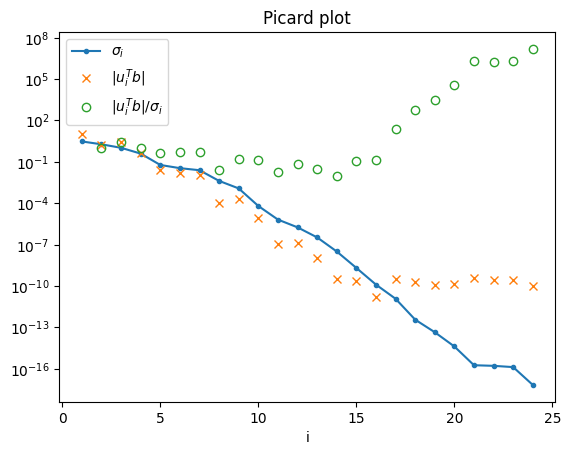

In [46]:
eta = picard(U, s, b_noisy)

# Part D

Compute the partial sums
$$
x_k = \sum_{i=1}^k \frac{u_i^T b}{\sigma_i} v_i, \quad k = 1, \ldots
$$
and inspect the vectors $x_k$ (plot them). Try to explain the behavior of these vectors.

**Response:** 
For small k, the partial sums capture only the signal dominated modes and hence converge smoothly towards a true solution's large scale features. Once k > picard threshold, each new mode contribtes to the amplified noise, causing the partial sum to develop high freq oscillations that overwhelm the true signal.

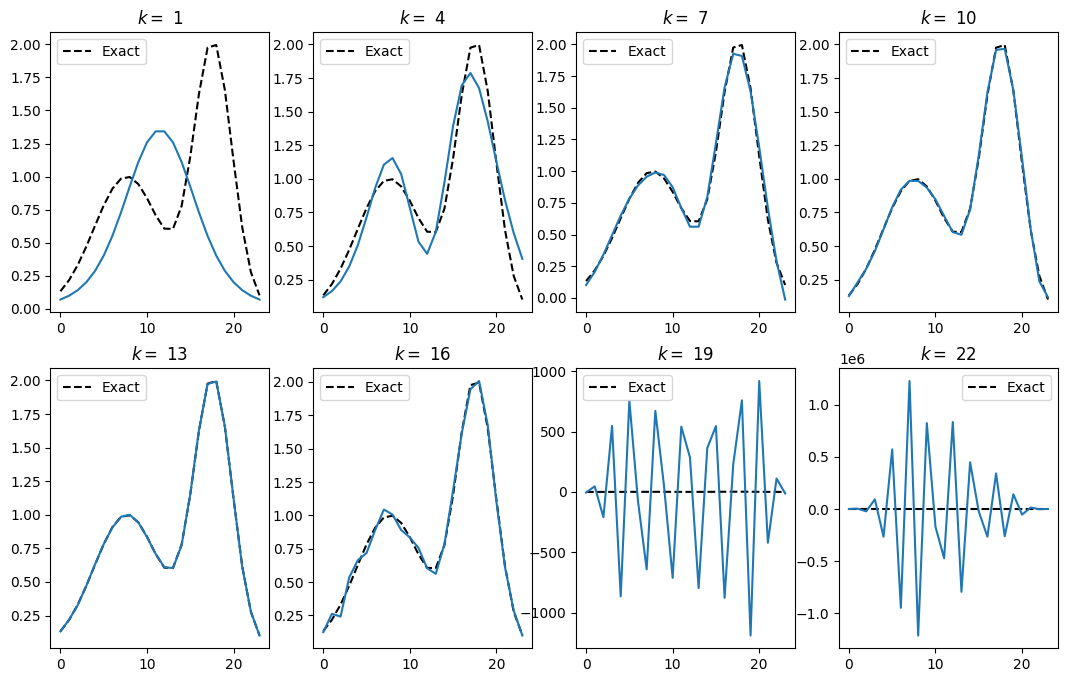

In [48]:
ks = np.arange(1,25,3)
fig, axs = plt.subplots(2,4, figsize=(13,8))

# Iterate over each axis
for j, ax in enumerate(axs.flat):

    # Plot exact solution
    ax.plot(x_exact, label="Exact", color="k", ls="--")
    if j == 0:
        ax.legend()

    # Title
    ax.set_title(f"$k = $ {ks[j]}")

    # Compute xk 
    k = ks[j]
    coeffs = (U[:, :k].T @ b_noisy) / s[:k]
    xk = V[:, :k] @ coeffs

    # Plot xk
    ax.plot(xk)
    ax.legend()
    # ax.set_ylim(-0.5, 2.5)

# Problem 3.7

## Part A

Choose $m = 40$ and $\eta = 10^{-5}$ and generate a number of instances of white Gaussian noise with standard deviation $\eta$, by means of `e = eta*np.random.normal(size=m)`. Check that the computed values of $\mathcal{E}(e)$, $\mathcal{E}(\| e \|_2^2)$, and $\mathcal{E}(\| e \|_2)$ are in accordance with the results in (3.20). Are they?

**Response:**
The empirical averages is similar with the theoretical values, confirming the noise behaves exactly as predicted

In [51]:
# Parameters
m = 40
eta = 1e-5

In [52]:
num_samples = 10000

e_samples = eta * np.random.randn(num_samples, m)

mean_e = np.mean(e_samples, axis=0)
mean_e_norm_sq = np.mean(np.sum(e_samples**2, axis=1))
mean_e_norm = np.mean(np.linalg.norm(e_samples, axis=1))

theoretical_mean_e = np.zeros(m)
theoretical_mean_e_norm_sq = m * eta**2
theoretical_mean_e_norm = eta * np.sqrt(2) * gamma_func((m + 1) / 2) / gamma_func(m / 2)



In [53]:
print(f"Mean of || e ||_2: {mean_e_norm:5e}")
print(f"Mean of || e ||_2^2: {mean_e_norm_sq:5e}")

Mean of || e ||_2: 6.277327e-05
Mean of || e ||_2^2: 3.990455e-09


In [54]:
print(f"Theoretical mean of || e ||_2: {theoretical_mean_e_norm:5e}")
print(f"Theoretical mean of || e ||_2^2: {theoretical_mean_e_norm_sq:5e}")

Theoretical mean of || e ||_2: 6.285154e-05
Theoretical mean of || e ||_2^2: 4.000000e-09


## Part B

Set up the same `shaw` problem from the previous problem, with exact rhs vector $b_{\text{exact}}$. Add a noise vector $e$ from part A to get a noisy rhs vector $b_{\text{noisy}}$. What is the relative noise level $\| e \|_2 / \| b_{\text{exact}} \|_2$

**Response:** Refer to answer below

In [56]:
# Setup shaw problem
A, b_exact, x_exact = shaw(m)

# Get SVD
U, s, Vt = np.linalg.svd(A, full_matrices=False)

e = eta * np.random.randn(m)
b_noisy = b_exact + e
noise_level = np.linalg.norm(e, 2) / np.linalg.norm(b_exact, 2)

In [57]:
print(f"Noise level: {noise_level:3e}")

Noise level: 4.227212e-06


## Part C

Use a semilogarithmic plot to show absolute values of the elements of $U^T b_{\text{exact}}$ and $U^T e$, and explain the behavior of these plots. In particular, explain why both graphs tend to level off in the right part of the plot, and explain the magnitude of the plateau.

**Response:** Both curves plateau on the right because the corresponding singular values become so small that true signal projections fall below floating‑point precision and noise projections dominate. The level of plateau for $|U^T b_{\text{exact}}|$ sits around $10^{-14}$ whereas $|U^T e|$ hovers near the nois amplitude ~$10^{-5}$ because white noise contributes roughly the same energy to each orthonormal direction.

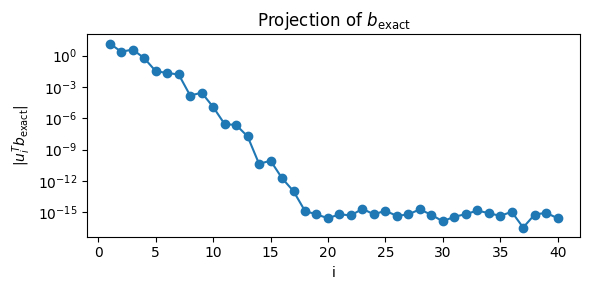

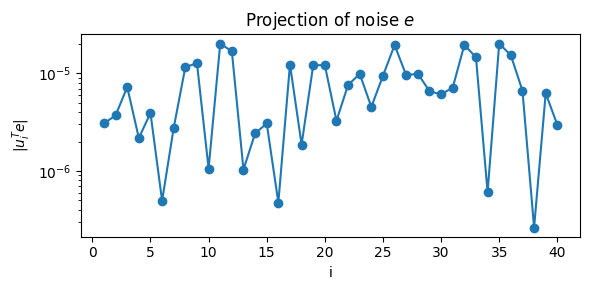

In [59]:
beta_exact = np.abs(U.T @ b_exact)
beta_noise = np.abs(U.T @ e)
# print("U.T @ b_exact: ", beta_exact.shape)
# print("U.T @ e: ", beta_noise.shape)

i_exact = np.arange(1, beta_exact.size + 1)
i_noise = np.arange(1, beta_noise.size + 1)

plt.figure(figsize=(6,3))
plt.semilogy(i_exact, beta_exact, 'o-')
plt.xlabel('i'); plt.ylabel(r'$|u_i^T b_{\rm exact}|$')
plt.title('Projection of $b_{\\rm exact}$')
plt.tight_layout()

plt.figure(figsize=(6,3))
plt.semilogy(i_noise, beta_noise, 'o-')
plt.xlabel('i'); plt.ylabel(r'$|u_i^T e|$')
plt.title('Projection of noise $e$')
plt.tight_layout()

plt.show()


## Part D

Show that if you want to generate a noisy rhs with a given noise level $\| e \|_2 / \| b_{\text{exact}} \|_2$ = `rnl`, you should use the Python code:
```python
e = np.random.normal(m)
e = e/np.linalg.norm(e)
e = rnl*np.linalg.norm(b_exact)*e
b = b_exact + e
```

**Response:**

In [61]:
rnl = noise_level

e = np.random.normal(size=m)
e = e / np.linalg.norm(e)
e = rnl * np.linalg.norm(b_exact) * e
b = b_exact + e

print("Desired rnl =", rnl)
print("Achieved ||e||/||b_exact|| =", np.linalg.norm(e)/np.linalg.norm(b_exact))

Desired rnl = 4.227211753423786e-06
Achieved ||e||/||b_exact|| = 4.227211753423786e-06
